# Loan Prediction


**-Kiran K**

CODE CLAUSE INTERNSHIP

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [65]:
test=pd.read_csv('/content/test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [66]:
train=pd.read_csv('/content/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
train.shape

(614, 13)

In [68]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [69]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
train.duplicated().sum()

0

In [71]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [73]:
numerical_values=[x for x in train.columns if train[x].dtype != 'O']
print("numerical_values:",numerical_values)
categorical_values=[y for y in train.columns if train[y].dtype == 'O']
print("categorical_values",categorical_values)


numerical_values: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_values ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [74]:
train.Gender.value_counts().nunique()

2

In [75]:
for col in categorical_values:
    print(train[col].value_counts())
    print("Total unique values:",train[col].value_counts().nunique())
    print("----------------------------------------")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Total unique values: 1
----------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
Total unique values: 2
----------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
Total unique values: 2
----------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Total unique values: 4
----------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Total unique values: 2
----------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
Total unique values: 2
----------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Total unique values: 3
-----------

<Axes: >

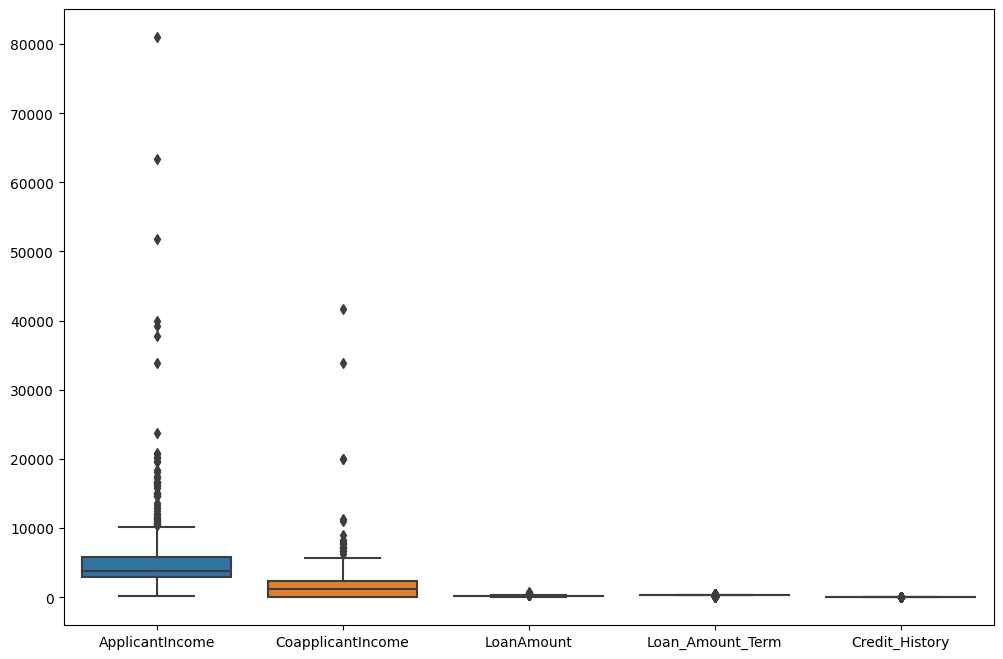

In [76]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train)

<ipython-input-77-8ea6feaf1948>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=train[numerical_values[i]],shade=True, color='b')
<ipython-input-77-8ea6feaf1948>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=train[numerical_values[i]],shade=True, color='b')
<ipython-input-77-8ea6feaf1948>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=train[numerical_values[i]],shade=True, color='b')
<ipython-input-77-8ea6feaf1948>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=train[numerical_values

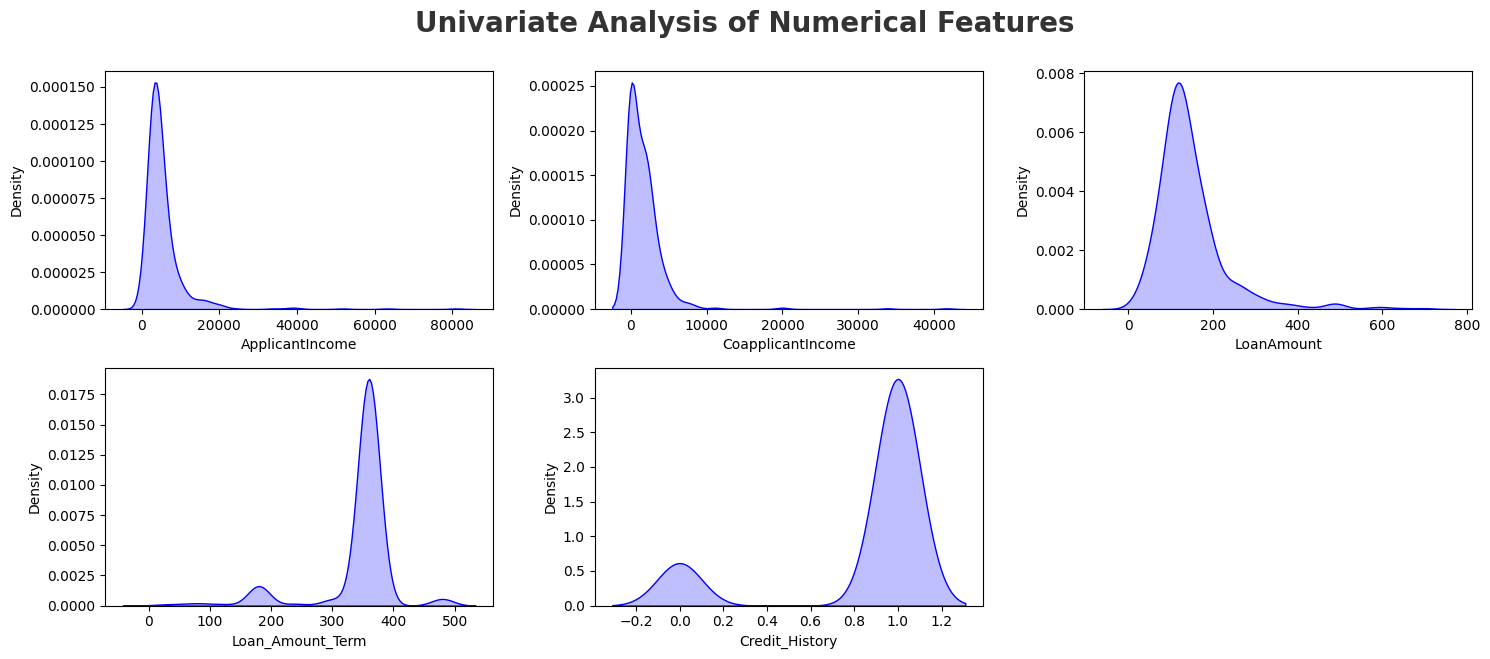

In [77]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_values)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=train[numerical_values[i]],shade=True, color='b')
    plt.xlabel(numerical_values[i])
    plt.tight_layout()

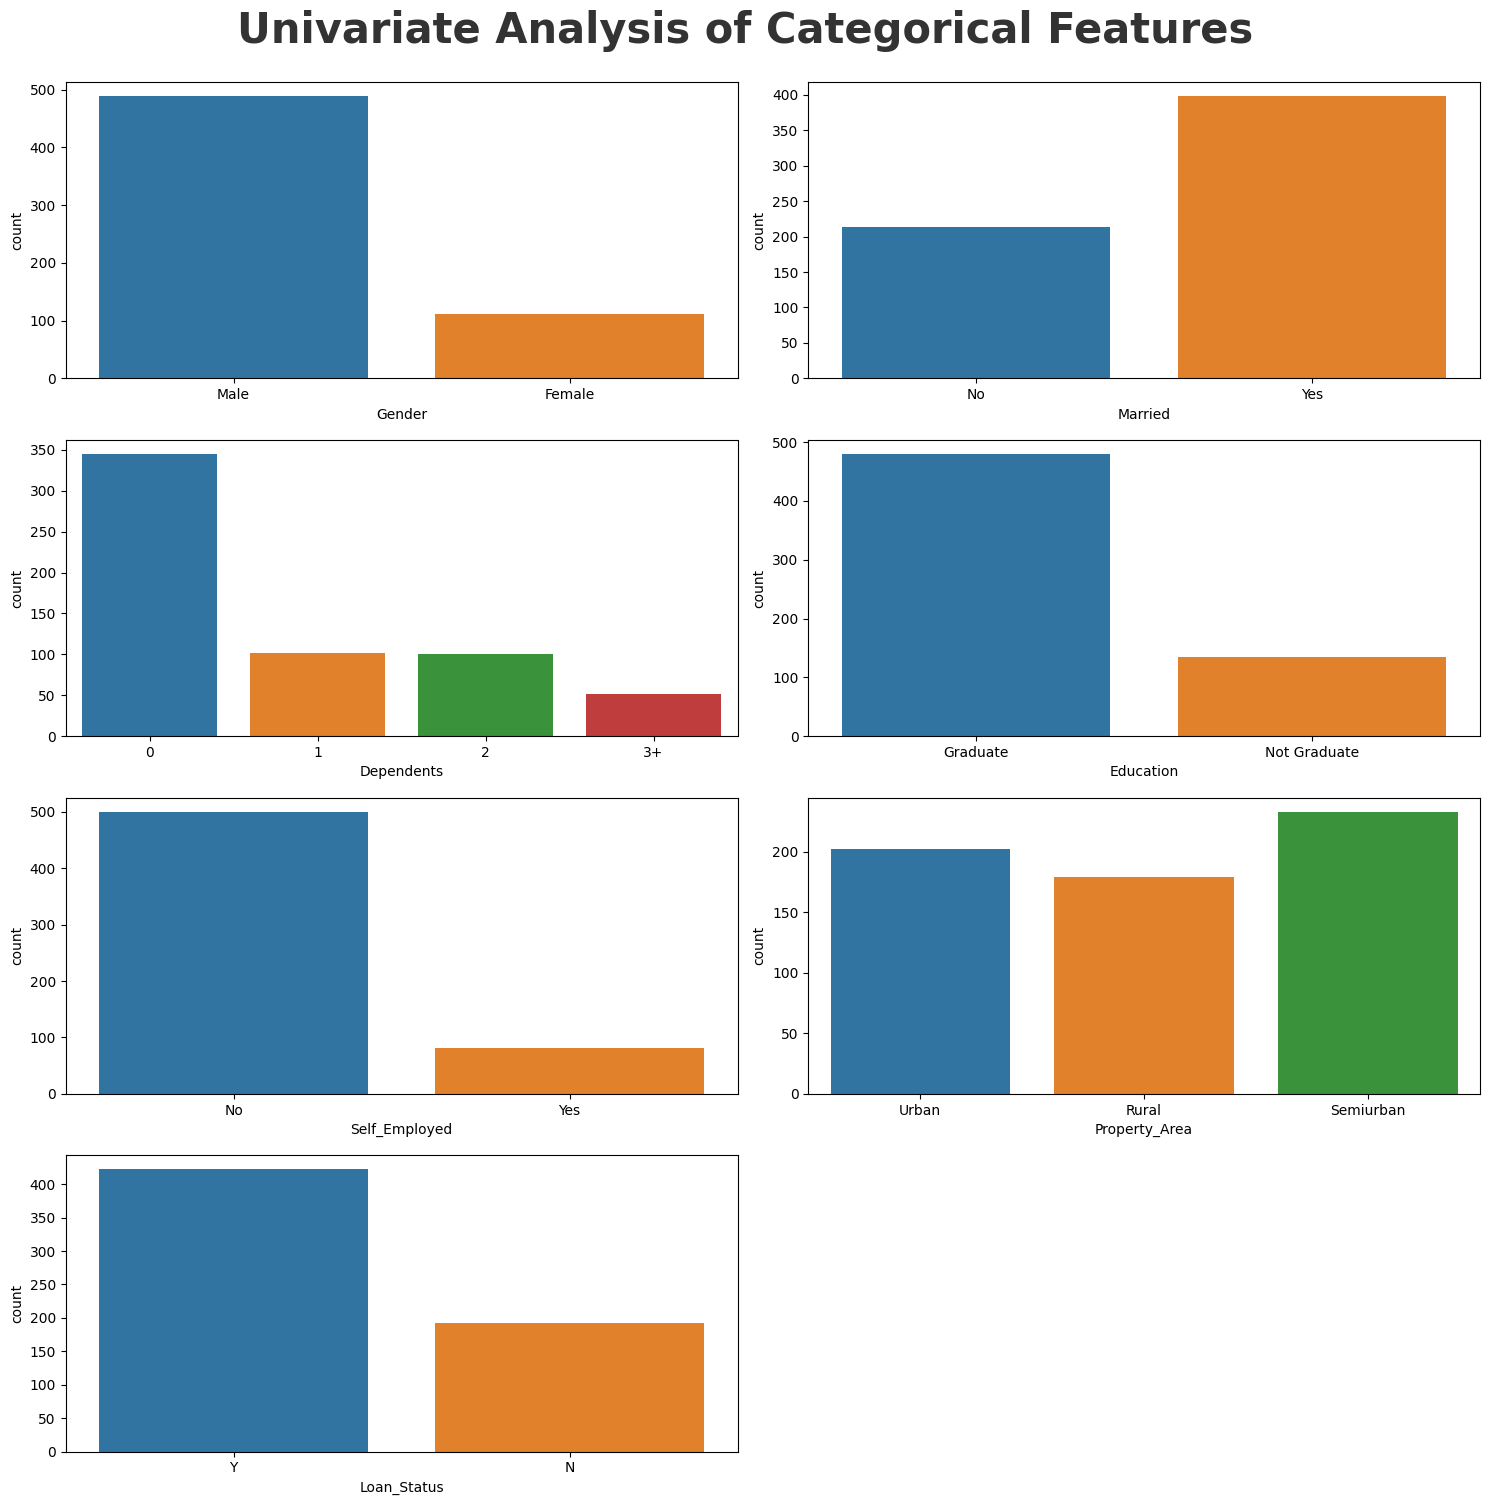

In [78]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=30, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i in range(0, len(cat1)):
    plt.subplot(4,2, i+1)
    sns.countplot(x=train[cat1[i]])
    plt.xlabel(cat1[i])
    plt.tight_layout()

In [79]:

for i in numerical_values:
    q1=train[i].quantile(0.25)
    q2=train[i].quantile(0.5)
    q3=train[i].quantile(0.75)
    iqr=q3-q1
    up=q3+(iqr*1.5)
    lw=q1-(iqr*1.5)
    train[i].clip(upper=up,lower=lw,inplace=True)

In [80]:


for col in numerical_values:
    train[col] = train[col].fillna(train[col].mean())
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

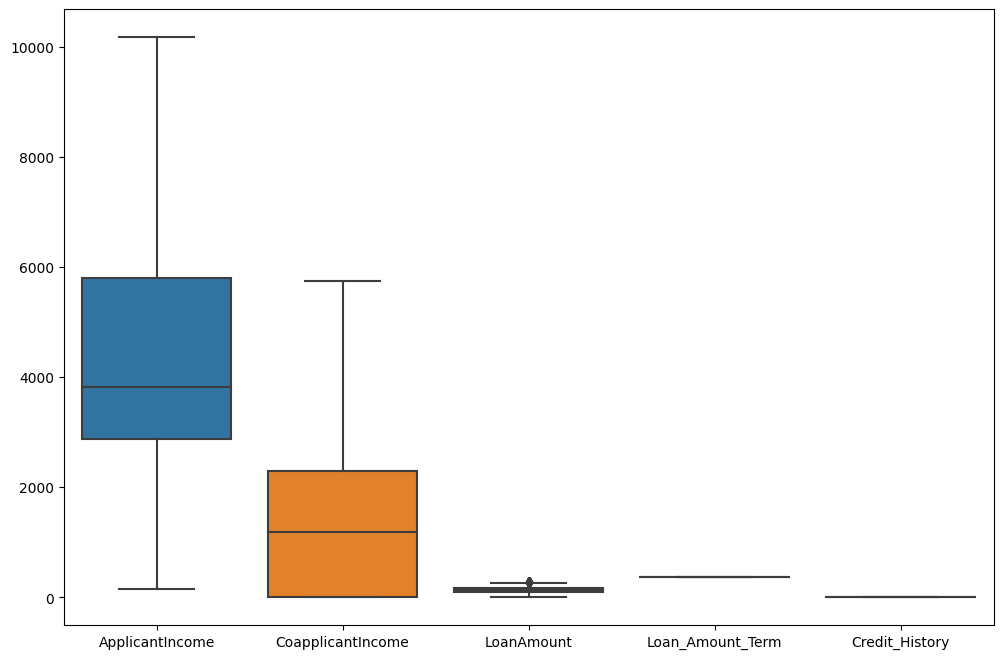

In [82]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train)

<ipython-input-83-1df3d0bfd6af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

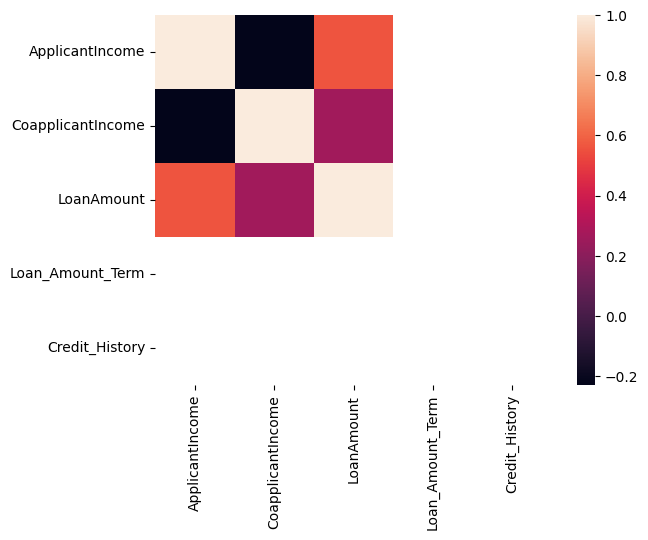

In [83]:
sns.heatmap(train.corr())

In [84]:
train.drop(columns='Loan_Amount_Term',inplace=True)



In [85]:
train.drop(columns='Credit_History',inplace=True)

In [86]:
le=LabelEncoder()
for i in categorical_values:
  train[i]=le.fit_transform(train[i])

In [87]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,138.288851,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.000000,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.000000,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.000000,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.000000,2,1


In [88]:
test.drop(["Loan_ID"],axis=1,inplace=True)


In [89]:
categorical_values_test=[x for x in test.columns if test[x].dtype == 'O']
numerical_values_test=[x for x in test.columns if test[x].dtype != 'O']

In [90]:
for col in numerical_values:
    test[col] = test[col].fillna(test[col].mean())
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<Axes: >

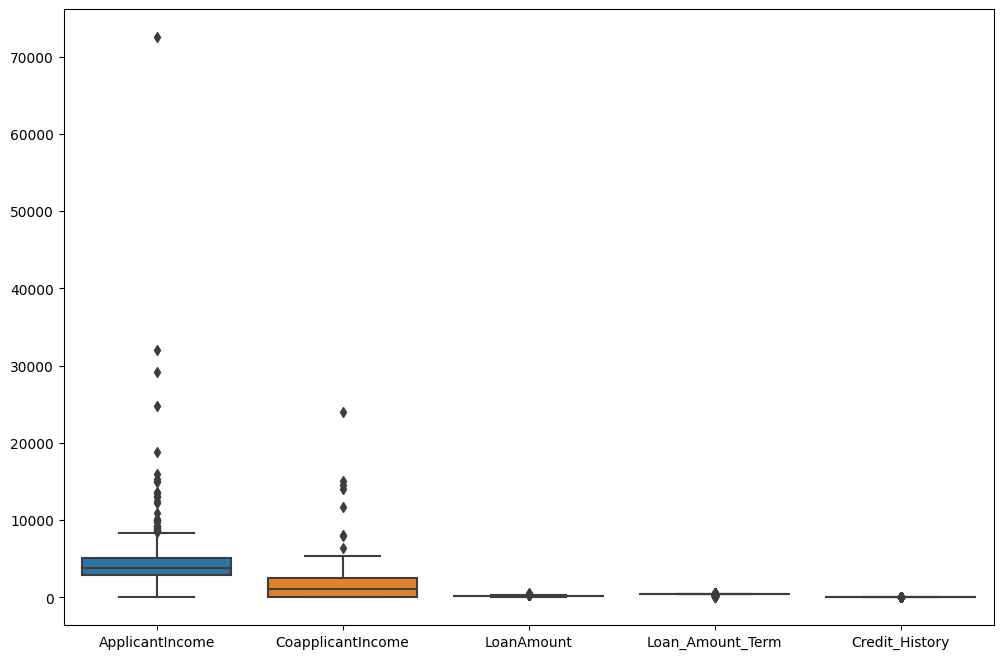

In [91]:
plt.figure(figsize=(12,8))
sns.boxplot(data=test)

In [92]:
for i in numerical_values_test:
    q1=test[i].quantile(0.25)
    q2=test[i].quantile(0.5)
    q3=test[i].quantile(0.75)
    iqr=q3-q1
    up=q3+(iqr*1.5)
    lw=q1-(iqr*1.5)
    test[i].clip(upper=up,lower=lw,inplace=True)

<Axes: >

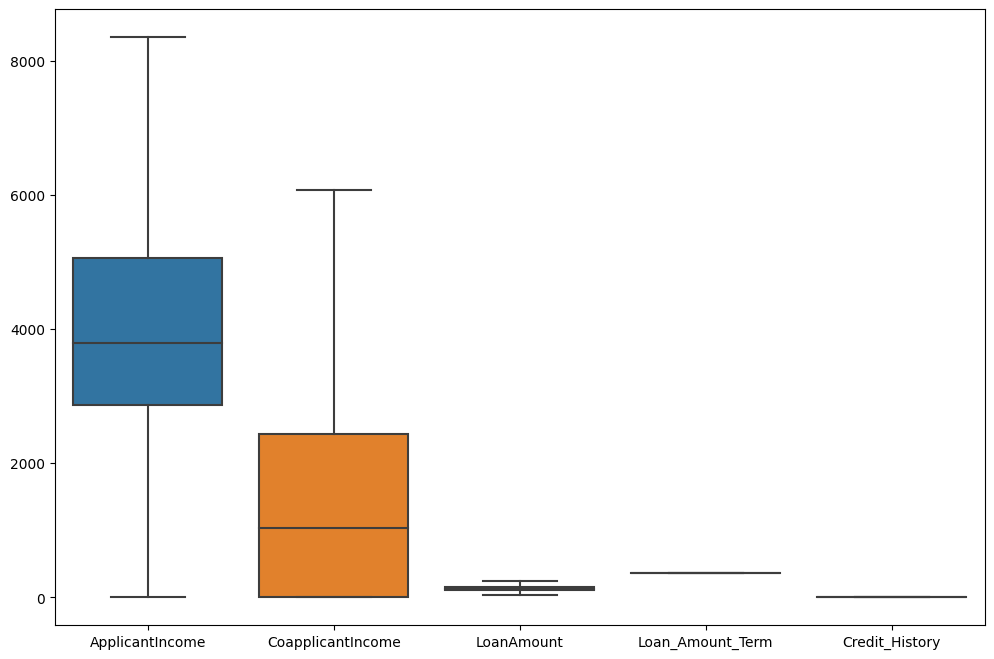

In [93]:
plt.figure(figsize=(12,8))
sns.boxplot(data=test)

In [94]:
test.drop(columns='Loan_Amount_Term',inplace=True)
test.drop(columns='Credit_History',inplace=True)

In [95]:
le=LabelEncoder()
for i in categorical_values_test:
  test[i]=le.fit_transform(test[i])

In [96]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area
0,1,1,0,0,0,5720,0.0,110.0,2
1,1,1,1,0,0,3076,1500.0,126.0,2
2,1,1,2,0,0,5000,1800.0,208.0,2
3,1,1,2,0,0,2340,2546.0,100.0,2
4,1,0,0,1,0,3276,0.0,78.0,2


In [97]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,138.288851,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.000000,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.000000,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.000000,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.000000,2,1


In [98]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train[['ApplicantIncome','CoapplicantIncome']]=sc.fit_transform(train[['ApplicantIncome','CoapplicantIncome']])

In [99]:
train[['LoanAmount']]=sc.fit_transform(train[['LoanAmount']])

In [100]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.568692,0.000000,0.495360,2,1
1,1,1,1,1,0,0,0.442360,0.262575,0.455939,0,0
2,2,1,1,0,0,1,0.284396,0.000000,0.218391,2,1
3,3,1,1,0,1,0,0.242784,0.410578,0.425287,2,1
4,4,1,0,0,0,0,0.583760,0.000000,0.505747,2,1


In [101]:
from sklearn.model_selection import train_test_split

X = train.drop(['Loan_Status'],axis=1)
Y = train['Loan_Status']
print(X.shape,Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(614, 10) (614,)


((429, 10), (185, 10), (429,), (185,))

#Random forest classifier

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(i) for i in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(10,110,num=11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
random_grid = {'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf, 'bootstrap' : bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [103]:
rfc = RandomForestClassifier(random_state = 23)
rfc_random = RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_jobs=-1,scoring='neg_mean_absolute_error',random_state=23,cv=3, return_train_score = True)
rfc2 = rfc_random.fit(X_train,Y_train)


In [104]:
rfc2.best_params_


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'bootstrap': False}

In [105]:
y_train_pred = rfc2.predict(X_train)
y_test_pred = rfc2.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score
print("Training score-",accuracy_score(y_train_pred,Y_train)*100)

Training score- 93.00699300699301


In [137]:
print("Testing score-",accuracy_score(y_test_pred,Y_test)*100)

Testing score- 65.4054054054054


#Logistic regression

In [108]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
pred_train=lg.predict(X_train)
pred_test=lg.predict(X_test)

In [139]:
print("Testing score-",accuracy_score(Y_test,pred_test)*100)

Testing score- 64.86486486486487


In [138]:
print("Training score-",accuracy_score(Y_train,pred_train)*100)

Training score- 70.3962703962704


#XGBOOST

In [114]:
from xgboost import XGBClassifier
random_grid={'n_estimators': [int(i) for i in np.linspace(50,1000,num=25)],
              'max_depth': [int(i) for i in np.linspace(10,80,num=10)],
              'learning_rate': [0.0001,0.01,0.01,0.1,0.2,0.3],}
xgbc=XGBClassifier(random_state=42,objective='binary:logistic')
xgbc_r=RandomizedSearchCV(estimator=xgbc,param_distributions=random_grid,n_jobs=-1,return_train_score=True,random_state=42,cv=5,scoring='neg_mean_absolute_error')


In [116]:
xgbc_fit=xgbc_r.fit(X_train,Y_train)


In [119]:
XGB_test_pred=xgbc_fit.predict(X_test)
XGB_train_pred=xgbc_fit.predict(X_train)

In [124]:
print("Testing score-",accuracy_score(Y_test,XGB_test_pred)*100)

64.32432432432432

In [140]:
print("Training score-",accuracy_score(Y_train,XGB_train_pred)*100)

Training score- 100.0


#ADABOOST CLASSIFIER

In [129]:
from sklearn.ensemble import AdaBoostClassifier
random_grid={'n_estimators':[int(i) for i in np.linspace(20,500,num=15)],
             'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
             'algorithm':['SAMME','SAMME.R']}

In [131]:
adc=AdaBoostClassifier(random_state=23)
adbc_random = RandomizedSearchCV(estimator=adc,param_distributions=random_grid,n_jobs=-1,scoring='neg_mean_absolute_error',random_state=23,cv=3, return_train_score = True)
adbc_final=adbc_random.fit(X_train,Y_train)

In [132]:

ADAB_test_pred=adbc_final.predict(X_test)
ADAB_train_pred=adbc_final.predict(X_train)


In [135]:
print("Testing score-",accuracy_score(Y_test,ADAB_test_pred)*100)

Testing score- 64.86486486486487


In [141]:
print("Training score-",accuracy_score(Y_train,ADAB_train_pred)*100)

Training score- 70.3962703962704


Adaboost model had the best accuracy in the test set of 64.8